Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 

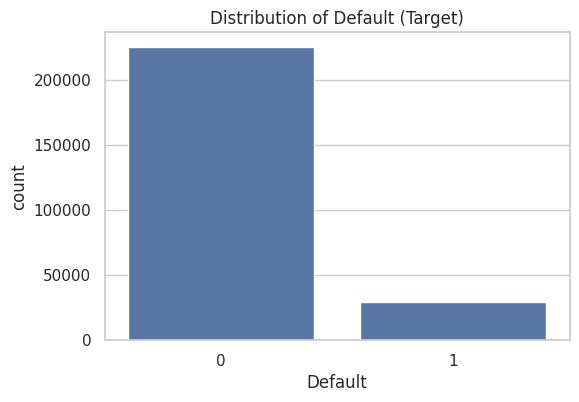

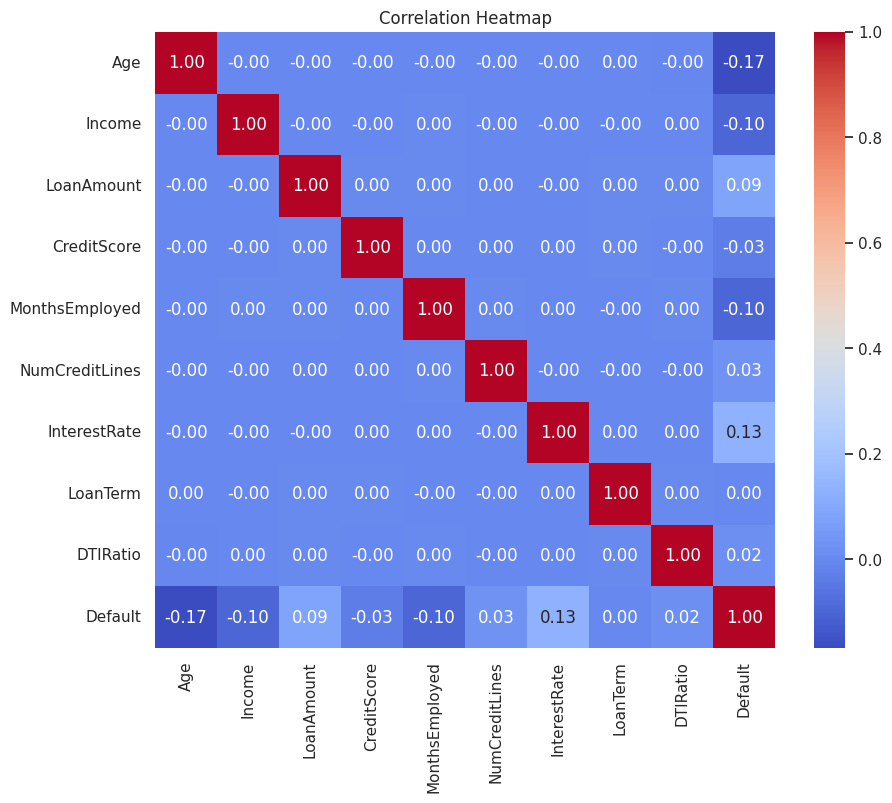

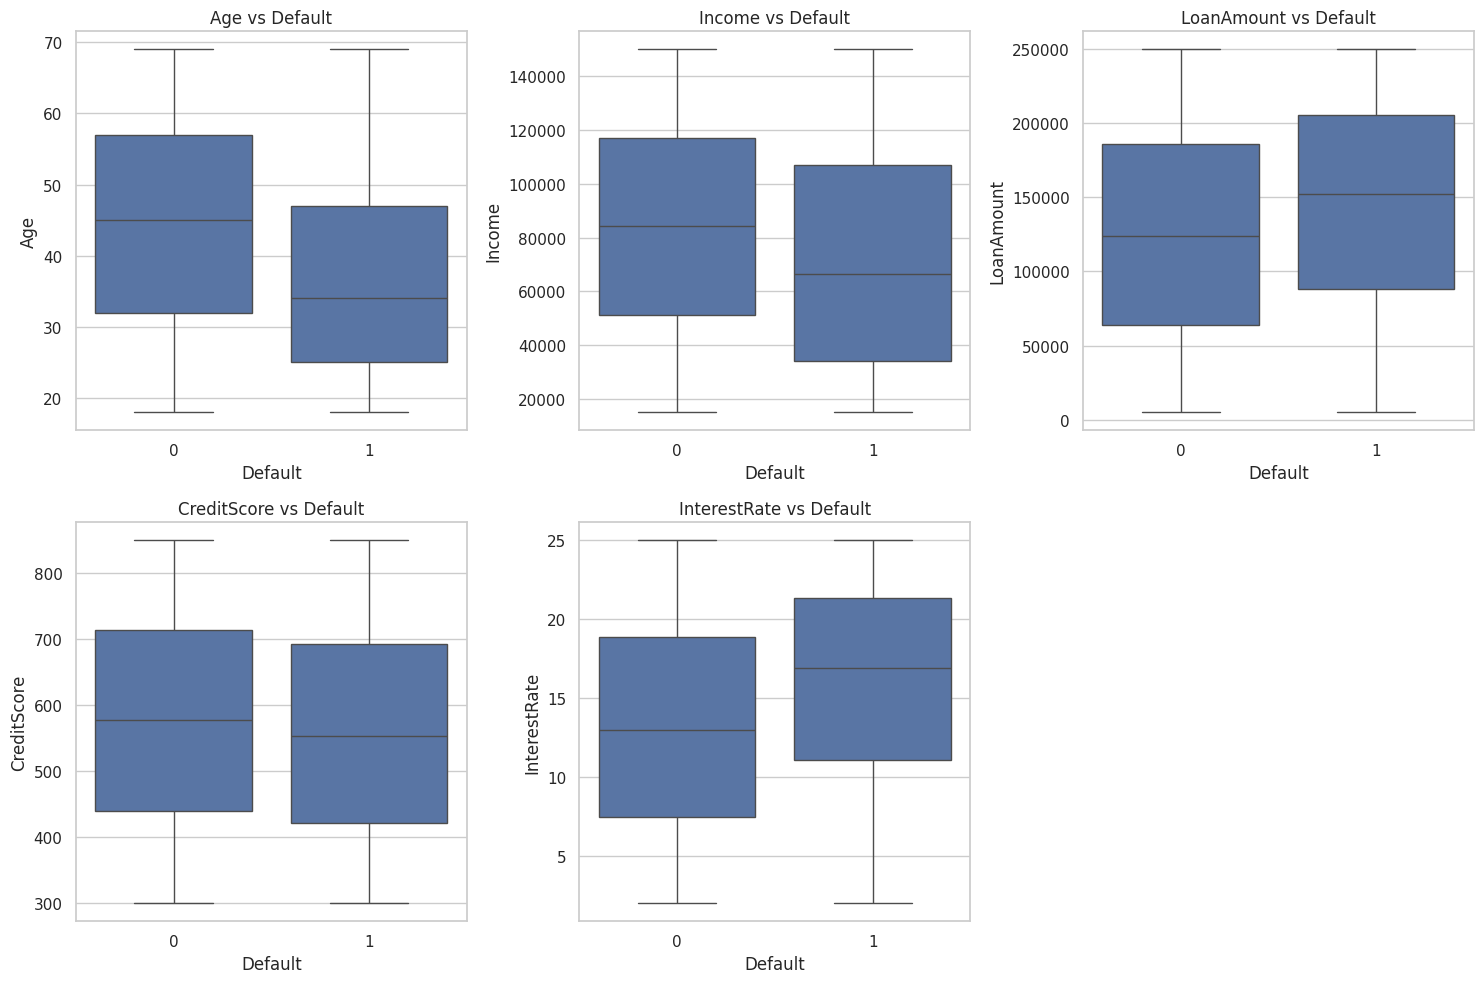

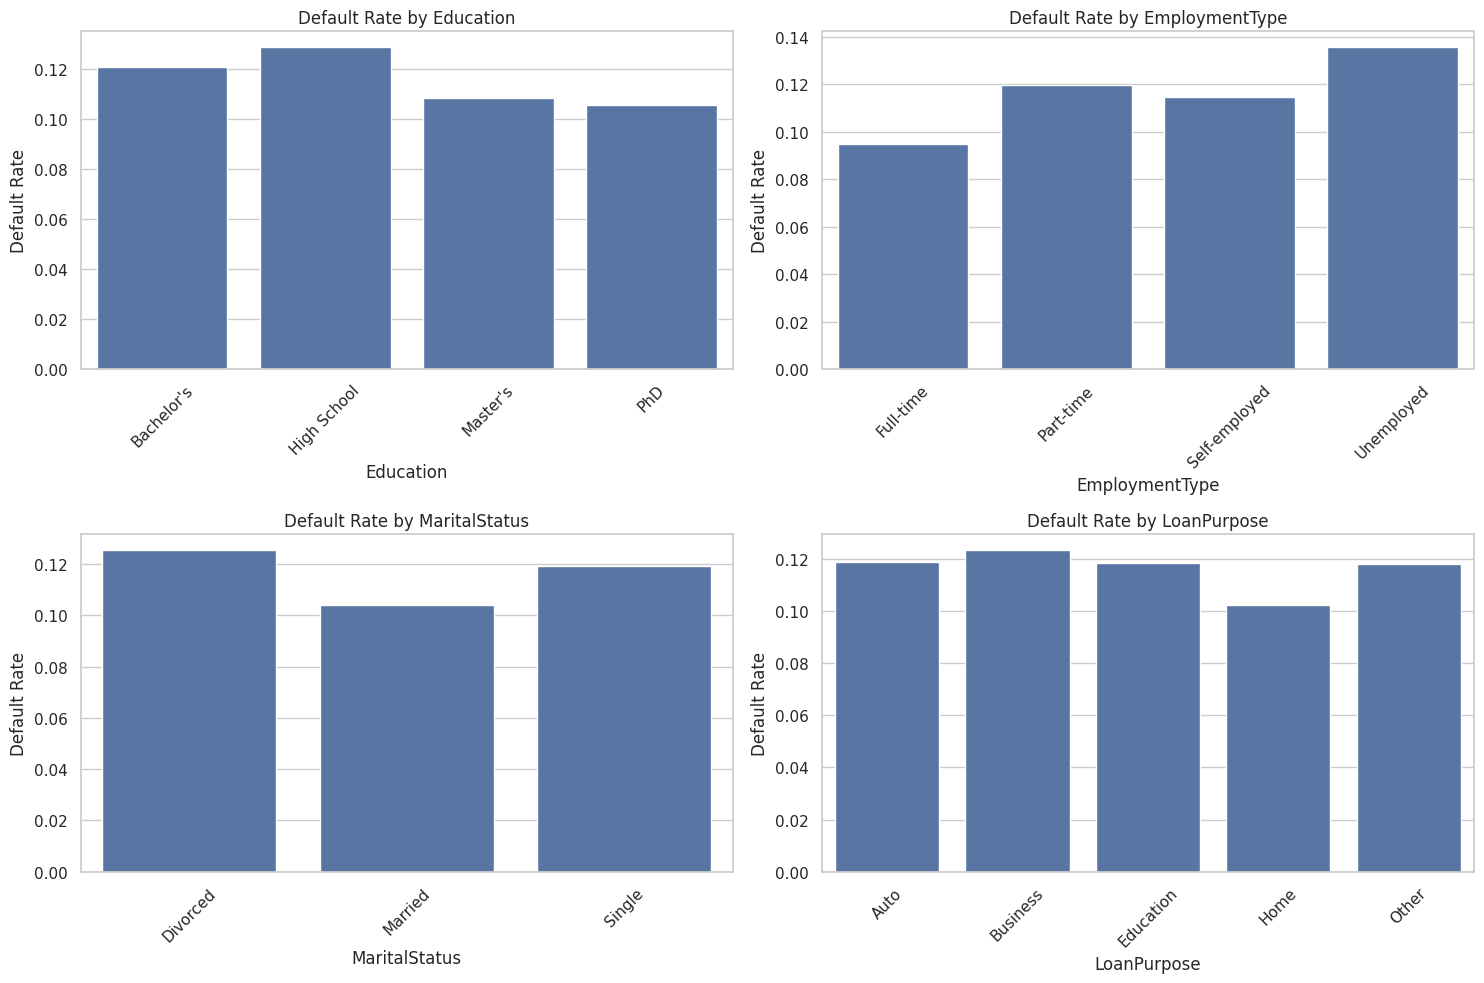

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Loan_default.csv')

print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=df)
plt.title('Distribution of Default (Target)')
plt.show()

plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

key_num_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'InterestRate']
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_num_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Default', y=col, data=df)
    plt.title(f'{col} vs Default')
plt.tight_layout()
plt.show()

key_cat_features = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_cat_features):
    plt.subplot(2, 2, i + 1)
    default_rates = df.groupby(col)['Default'].mean().reset_index()
    sns.barplot(x=col, y='Default', data=default_rates)
    plt.title(f'Default Rate by {col}')
    plt.ylabel('Default Rate')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()